## Goal of the Project

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we want to build a model that can predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

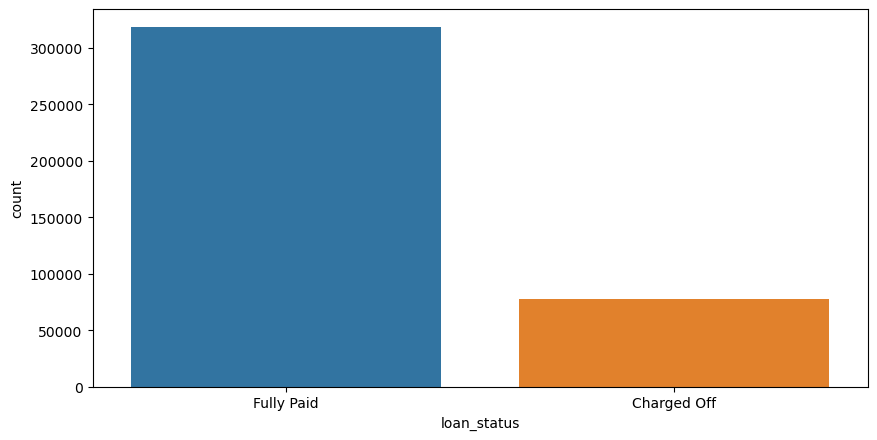

In [5]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='loan_status')

Data is not balanced

(0.0, 45000.0)

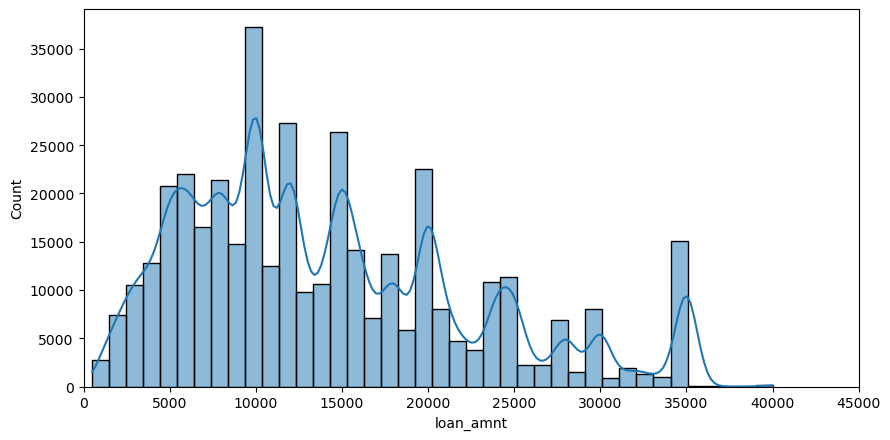

In [6]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['loan_amnt'],kde=True,bins=40)
plt.xlim(0,45000)

There are several ranges od ammout that tends to be most popular 

In [7]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


<AxesSubplot:>

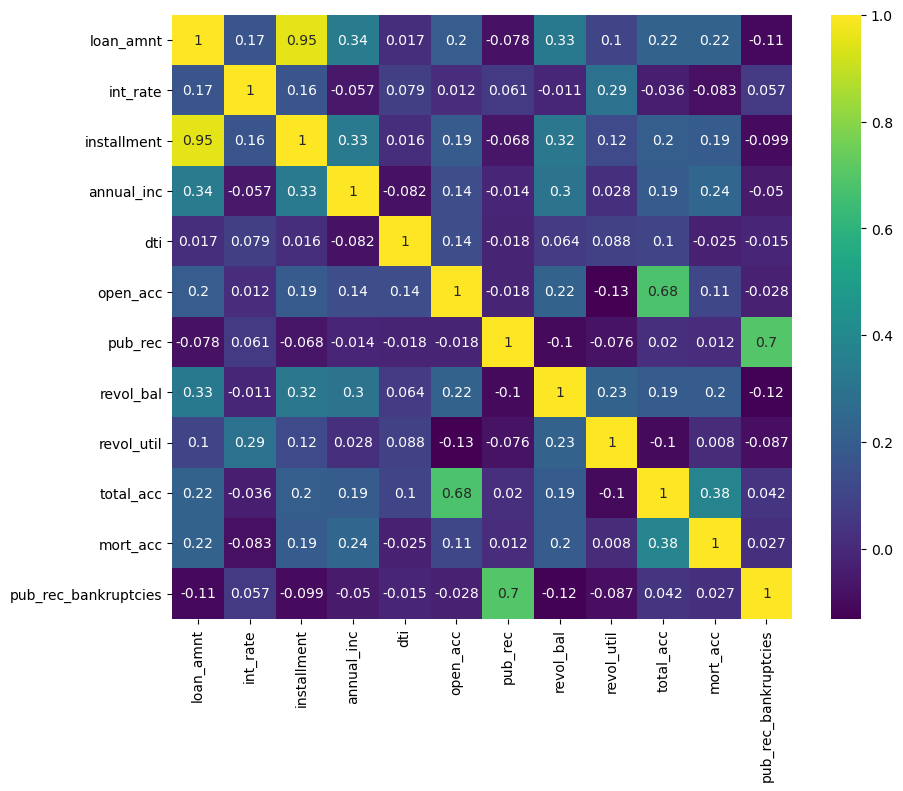

In [9]:
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(data=np.round(df.corr(),3), annot=True, cmap='viridis')

There is a very strong correlation between installment and loan_amnt

In [10]:
print(data_info.loc['installment']['Description'])

The monthly payment owed by the borrower if the loan originates.


In [11]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

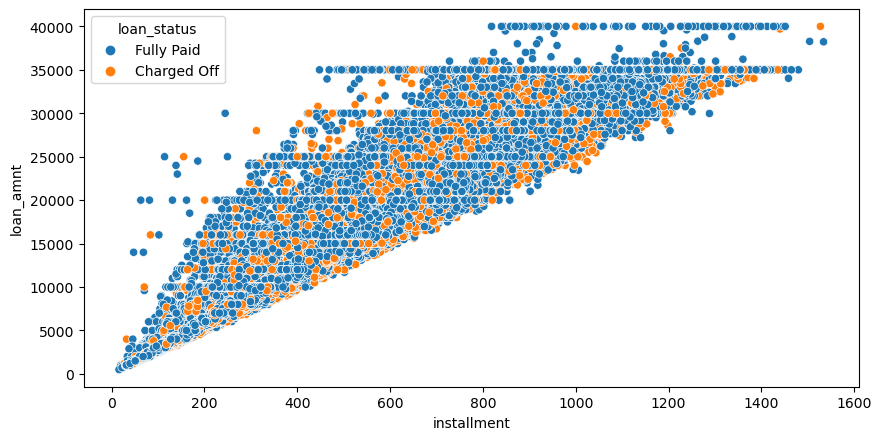

In [12]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='installment', y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

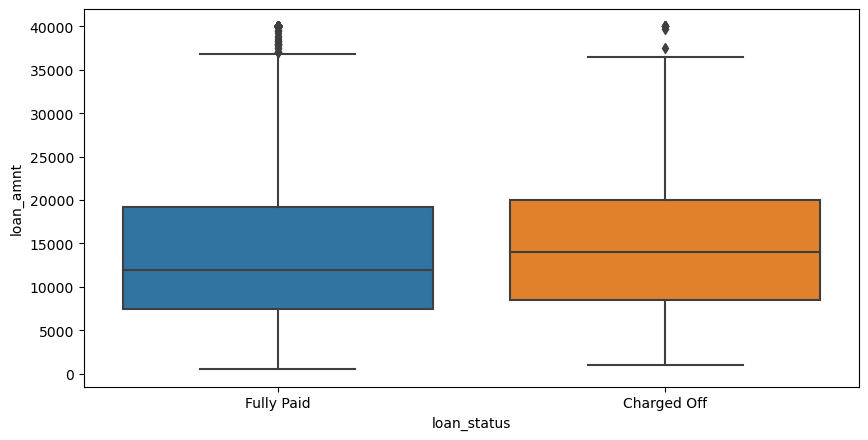

In [13]:
plt.figure(figsize=(10,5), dpi=100)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

There is a little tendency that higher loan_amnt contribute to Charged Off

In [14]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Lets check grades

In [15]:
np.sort(df['grade'].unique().tolist())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U1')

In [16]:
np.sort(df['sub_grade'].unique().tolist())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype='<U2')

<AxesSubplot:xlabel='grade', ylabel='count'>

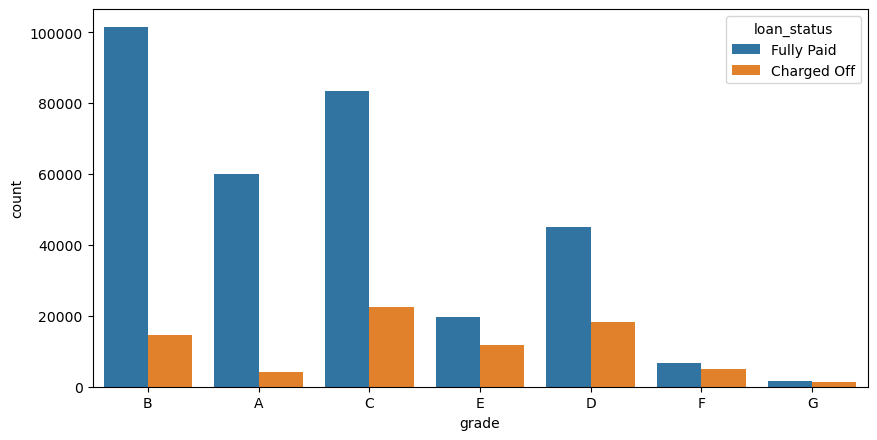

In [17]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='grade', hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

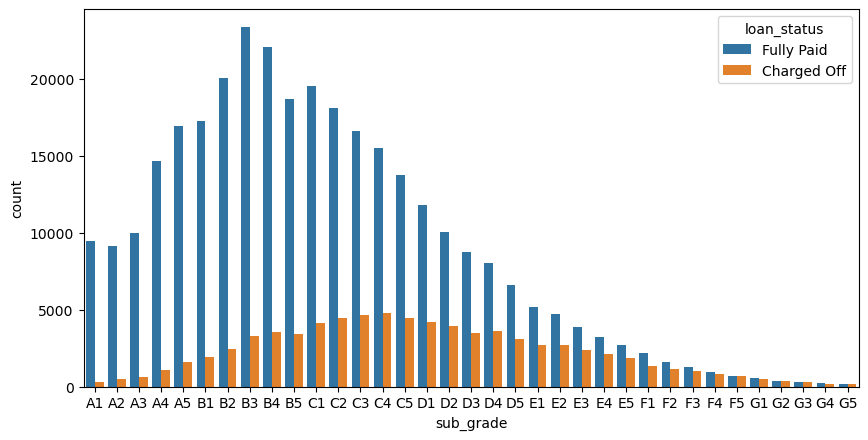

In [18]:
plt.figure(figsize=(10,5), dpi=100)
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order, hue='loan_status')

F and G subgrades don't get paid back that often

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

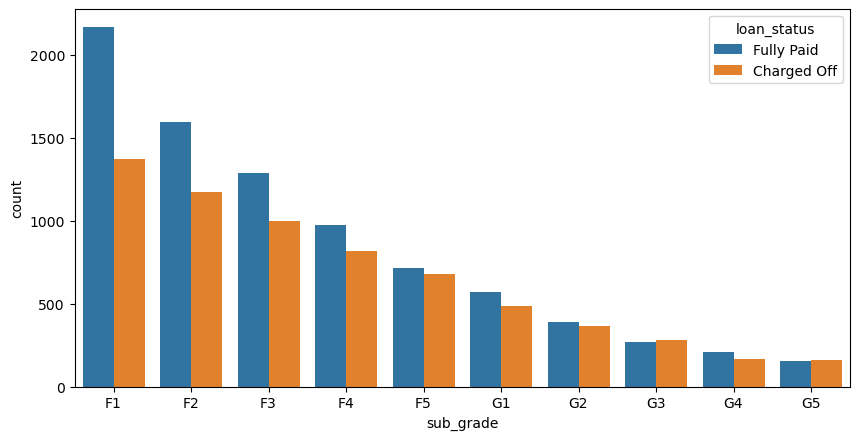

In [19]:
plt.figure(figsize=(10,5), dpi=100)
df_fg = df[df['grade'].isin(['F','G'])]
subgrade_order = sorted(df_fg['sub_grade'].unique())
sns.countplot(data=df_fg, x='sub_grade', order=subgrade_order, hue='loan_status')

We will create a new column 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [20]:
def paid(df):
    if df == 'Fully Paid':
        return 1
    return 0

In [21]:
df['loan_repaid'] = df['loan_status'].apply(paid)

Lets take a look at correlation between numeric features and new column

(-0.4, 0.4)

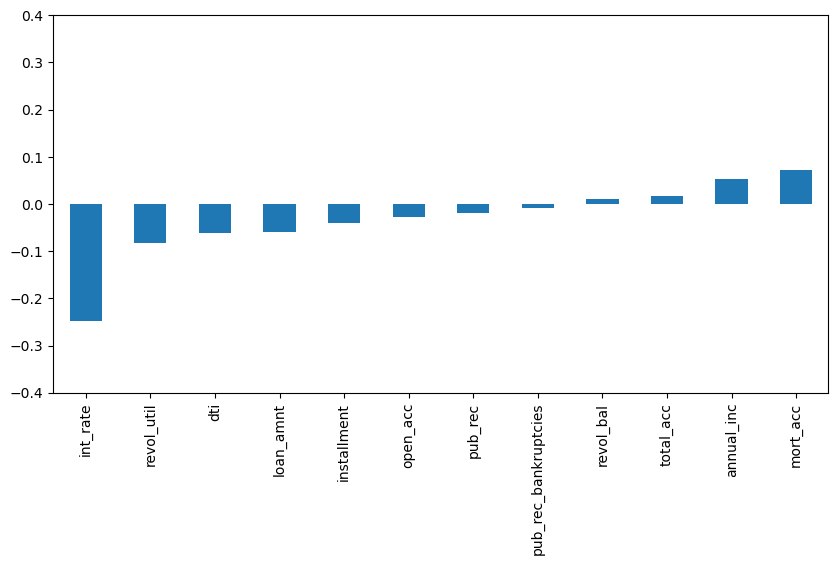

In [22]:
plt.figure(figsize=(10,5), dpi=100)
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')
plt.ylim(-0.4,0.4)

### Data Preprocessing

Calculate percent of data missing

In [23]:
len(df)

396030

In [24]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Focus on emp_title and emp_length

In [25]:
print(data_info.loc['emp_title']['Description'])

The job title supplied by the Borrower when applying for the loan.*


In [26]:
print(data_info.loc['emp_length']['Description'])

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [27]:
df['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
The Owner                          1
Department Of Motor Vehicles       1
Assistant Superintendant           1
washington hospital                1
Infoblox                           1
Name: emp_title, Length: 173105, dtype: int64

We have got 173105 unique titles, lets remove whole column

In [28]:
df = df.drop('emp_title', axis=1)

In [29]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [30]:
emp_length_order = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

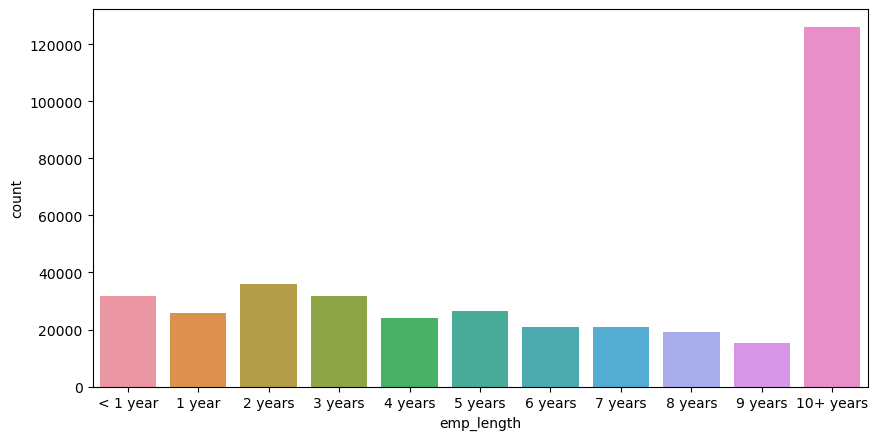

In [31]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='emp_length', data=df, order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

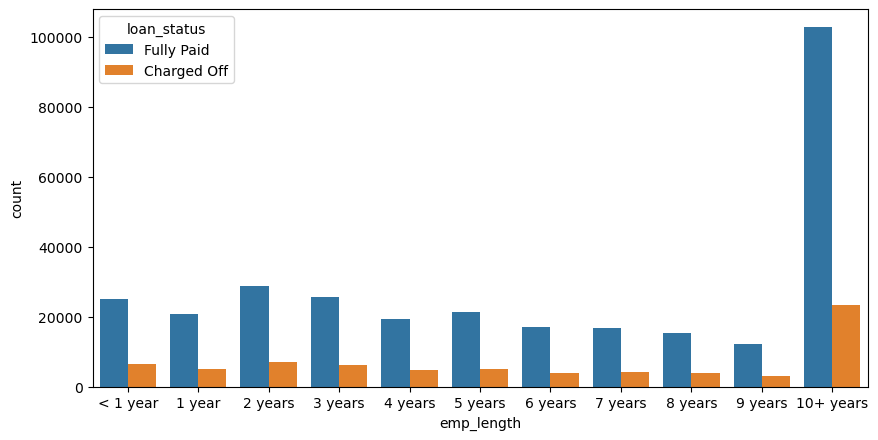

In [32]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

Percenatge of people with set emp_length that got Charged Off

In [33]:
emp_length_per = pd.pivot_table(data=df,
                                index='loan_status',
                                columns='emp_length',
                                values= 'loan_repaid',
                                aggfunc='count').transpose().reset_index()

In [34]:
emp_length_per['per'] = emp_length_per['Charged Off'] / emp_length_per['Fully Paid']

<AxesSubplot:xlabel='emp_length', ylabel='per'>

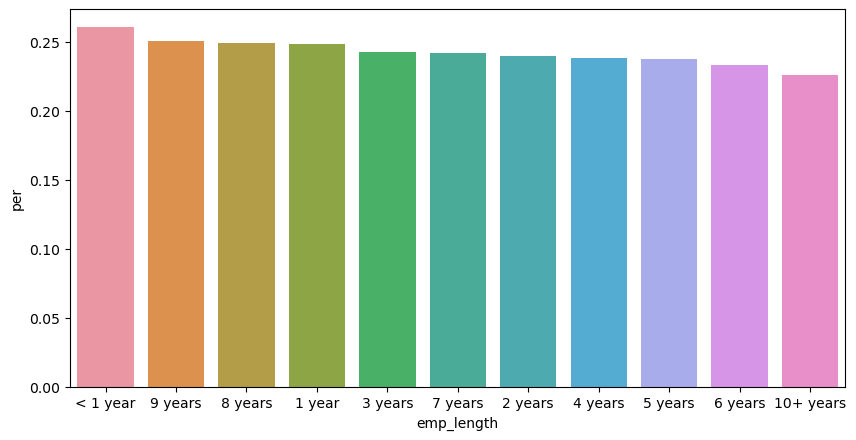

In [35]:
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=emp_length_per.sort_values('per', ascending=False), x='emp_length', y='per')

All group all very simialr, lets drop thta column

In [36]:
df = df.drop('emp_length', axis=1)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

From Data Overview title column and purpose column seems very similar...

In [38]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

Title column is simply a string subcategory of the purpose column

In [40]:
df = df.drop('title',axis=1)

Now mort_acc

In [41]:
print(data_info.loc['mort_acc']['Description'])

Number of mortgage accounts.


In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [43]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

We will group df by total_acc and calculate mean of the mort_acc

In [44]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [45]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [46]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [47]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

The number of missing data is so small that we can drop it

In [48]:
df = df.dropna(axis=0)

It is time to handle categorical data

In [49]:
list(df.select_dtypes(include=['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [50]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [51]:
def months(value):
    if value.split()[0] == '36':
        return 36
    return 60

In [52]:
df['term'] = df['term'].apply(months)

Grade is part of sub_grade, so just drop the grade

In [53]:
df = df.drop('grade', axis=1)

In [54]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'])

In [55]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

Create dummy for columns:
- verification_status,
- application_type,
- initial_list_status,
- purpose

In [56]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]])
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

home_ownership column

In [57]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Replace ANY, NONE to OTHER and get dummies

In [58]:
df['home_ownership'] = df['home_ownership'].map({'ANY':'OTHER', 'NONE':'OTHER'})

In [59]:
home_dummies = pd.get_dummies(df['home_ownership'])
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, home_dummies], axis=1)

In address column, we will separate zip code and store it as dummy variable

In [60]:
df['address'][0]

'0174 Michelle Gateway\nMendozaberg, OK 22690'

In [61]:
def zip_code(val):
    return val[-5:]

In [62]:
df['zip_code'] = df['address'].apply(zip_code)

In [63]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [64]:
zip_dummies = pd.get_dummies(df['zip_code'])
df = df.drop('zip_code', axis=1)
df = df.drop('address', axis=1)
df = pd.concat([df, zip_dummies], axis=1)

Take a look at issue_d

In [65]:
list(df.select_dtypes(include=['object']).columns)

['issue_d', 'loan_status', 'earliest_cr_line']

In [66]:
print(data_info.loc['issue_d']['Description'])

The month which the loan was funded


It does not make sens to keep that column. We want to create a model that will predict if a certain user pays his loan. We will not have issue_d information while passing users attributes into the model.

In [67]:
df = df.drop('issue_d', axis=1)

The last one, earliest_cr_line. It is a date value. I will only take the year from that column

In [68]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

We can drop loan_status, because we creaated numeric column loan_repaid

In [69]:
df = df.drop('loan_status', axis=1)

### ML

In [70]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

We will use MinMaxScaler to scale our data

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_train.shape

(316175, 82)

We will use early stoping and dropout layers to avoid overfitting. Activation function will be relu

In [109]:
model = Sequential()

model.add(Dense(82, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [110]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [111]:
model.fit(X_train, y_train,
         epochs=100,
         batch_size=128,
         validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/100
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2814 - val_loss: 0.2628
Epoch 2/100
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2630 - val_loss: 0.2626
Epoch 3/100
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2615 - val_loss: 0.2620
Epoch 4/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2608 - val_loss: 0.2617
Epoch 5/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2605 - val_loss: 0.2619
Epoch 6/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2602 - val_loss: 0.2616
Epoch 7/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2598 - val_loss: 0.2618
Epoch 8/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2595 - val_loss: 0.2613
Epoch 9/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.2592 - val_loss: 0.2613
Epoch 10/100
2471/2471 [==============================] - 4s 2ms/step - l

In [112]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

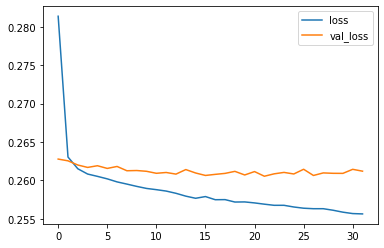

In [113]:
losses.plot()

In [106]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 2s 801us/step


In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [108]:
confusion_matrix(y_test, predictions)

array([[ 7207,  8451],
       [  399, 62987]], dtype=int64)

Taking into account that it is very imbalanced data, we got alright results. Recall could be better, but all round accuracy is really nice. Early stoping worked, we see a down tendency of training error (it could possibly go even lower) but we dont want to risk increase in testing error.